### Bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-----------------------------------------------------------------
### Parte 1

#### Função de Distribuição Cumulativa - Variáveis Discretas ou Contínuas

In [3]:
# 1 - e^(-lambda*x)
def eq_cdf(lam, x):
    return 1-np.exp(-lam*x)

In [4]:
def cdf(dados, va_discreta):
    dados.sort()
    lam = 0.5;
    y_vals1 = np.array([eq_cdf(lam, x) for x in dados])
    lam = 1;
    y_vals2 = np.array([eq_cdf(lam, x) for x in dados])
    lam = 1.5;
    y_vals3 = np.array([eq_cdf(lam, x) for x in dados])

    fig, ax = plt.subplots(figsize=(10,6))
    
    if va_discreta:
        ax.step(dados, y_vals1, label="lambda=0.5", marker="o", linestyle='-',where='post')
        ax.step(dados, y_vals2, label="lambda=0.5", marker="o", linestyle='--',where='post')
        ax.step(dados, y_vals3, label="lambda=0.5", marker="o", linestyle=':',where='post')
    else:
        ax.plot(dados, y_vals1, label="lambda=0.5", linestyle='-')
        ax.plot(dados, y_vals2, label="lambda=1.0", linestyle='--')
        ax.plot(dados, y_vals3, label="lambda=1.5", linestyle=':')
        
    ax.set_title("Função de Distribuição Cumulativa")
    ax.set_xlabel('x')
    ax.set_ylabel("P(X <= x)")
    plt.legend()
    plt.show()

#### Função de Massa de Probabilidade - Variáveis Discretas

Associa cada valor de uma v.a. (eixo x) a uma probabilidade (eixo y)

In [5]:
def pmf(dados):
    val, cnt = np.unique(dados, return_counts=True)
    pmf = cnt / len(dados)
    # values along with probability mass function
    np.column_stack((val, pmf))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(val, pmf)
    ax.set_title("Função de Massa de Probabilidade")
    ax.set_xlabel('x')
    ax.set_ylabel("P(x)")
    plt.show()

#### Utilizando as funções definidas

In [6]:
va_discreta = False #True
if va_discreta:
    cdf_dataset = np.random.randint(0,10,50)
else:
    cdf_dataset = np.linspace(0,10,50)

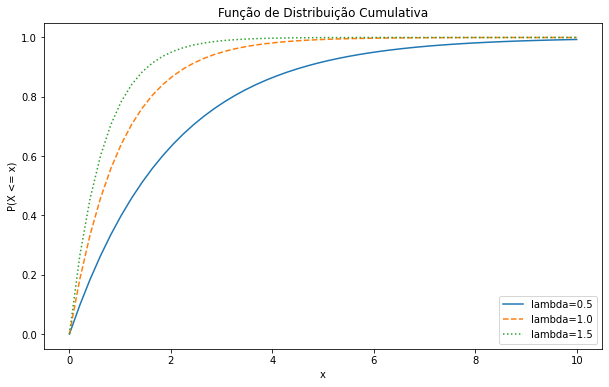

In [7]:
cdf(cdf_dataset, va_discreta)

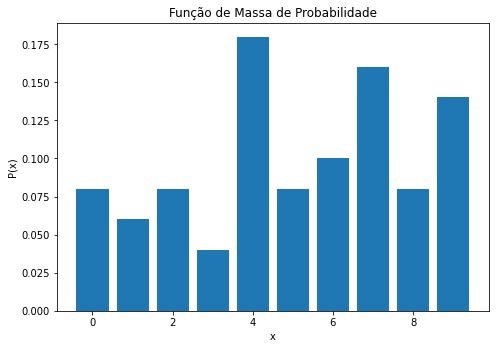

In [8]:
cdf_dataset = np.random.randint(0,10,50)
pmf(cdf_dataset)

#### Função Densidade de Probabilidade - Variáveis Contínuas

In [9]:
# e^(-lambda*x)
def eq_pdf(lam, x):
    return np.exp(-lam*x)

In [10]:
def pdf(dados):
    lam = 0.5;
    y_vals1 = np.array([eq_pdf(lam, x) for x in dados])
    lam = 1;
    y_vals2 = np.array([eq_pdf(lam, x) for x in dados])
    lam = 1.5;
    y_vals3 = np.array([eq_pdf(lam, x) for x in dados])

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(dados, y_vals1, label="lambda=0.5", linestyle='-')
    ax.plot(dados, y_vals2, label="lambda=1.0", linestyle='--')
    ax.plot(dados, y_vals3, label="lambda=1.5", linestyle=':')
    ax.set_title("Função de Massa de Probabilidade")
    ax.set_xlabel('x')
    ax.set_ylabel("P(X <= x)")
    plt.legend()

#### Utilizando a função PDF

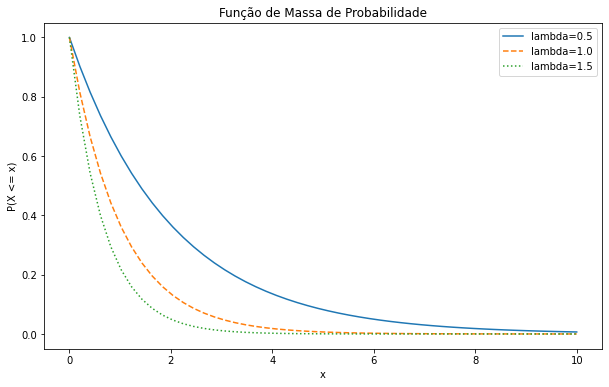

In [11]:
pdf_dataset = np.linspace(0,10,50)
pdf(pdf_dataset)

-----------------------------------------------------------------
### Parte 2